# Final Model Training

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import math, pickle

In [3]:
# Import train and validation data
y_train = pd.read_pickle('dataframes/y-train.pkl')
y_val = pd.read_pickle('dataframes/y-val.pkl')
X_train = pd.read_pickle('dataframes/x-train.pkl')
X_val = pd.read_pickle('dataframes/x-val.pkl')

# Combine train and validation data
X_train = pd.concat([X_train, X_val])
y_train = pd.concat([y_train, y_val])

# Read in test data
X_test = pd.read_pickle('dataframes/x-test.pkl')
y_test = pd.read_pickle('dataframes/y-test.pkl')

In [4]:
# Create Random Forest Model with 75 trees and a max depth of 25

rf = RandomForestRegressor(n_estimators=75, max_depth=25, random_state=42, n_jobs=6)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, n_estimators=75, n_jobs=6, random_state=42)

In [6]:
# Save random forest model to pickle file

with open('models/rf.pkl', 'wb') as f:
    pickle.dump(rf, f)

# Model Evaluation on Test Data

In [7]:
# Predict on test data
y_pred = rf.predict(X_test)

# Print statistics
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', math.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred))

Mean Absolute Error: 29426.945296358786
Mean Squared Error: 2056632249.56506
Root Mean Squared Error: 45350.107492320894
Mean Absolute Percentage Error: 0.053506315774283435


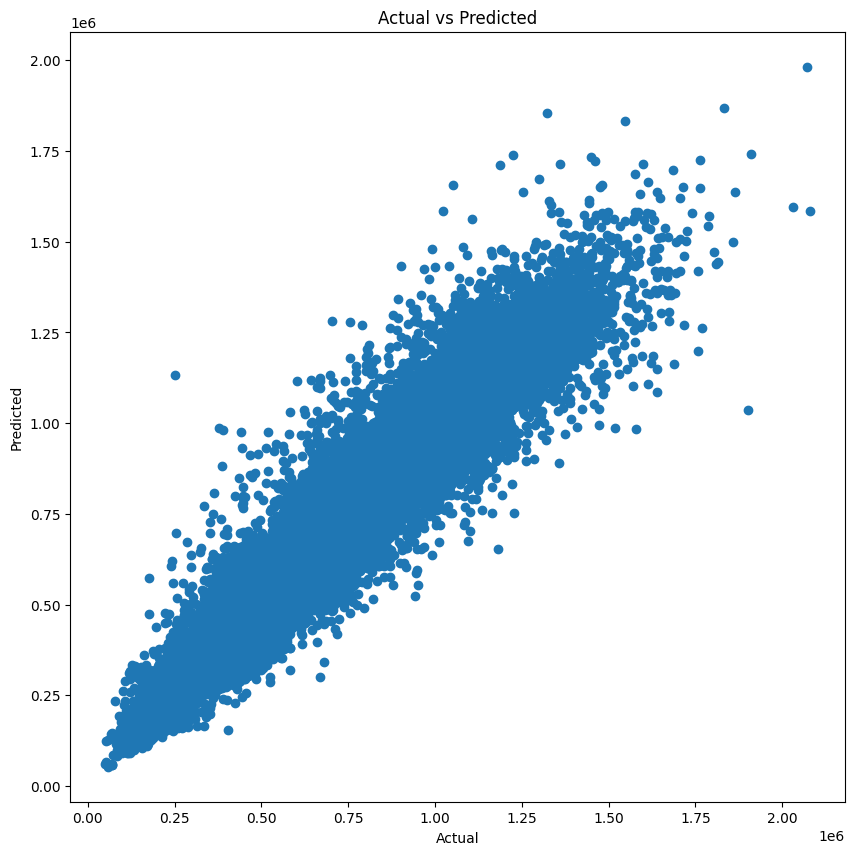

In [8]:
# Plot y_pred vs y_test
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
# Plot histogram of residuals
plt.figure(figsize=(10, 10))
plt.hist(y_test - y_pred, bins=50)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.title('Residual Histogram')
plt.show()

In [ ]:
# Plot residuals
plt.figure(figsize=(10, 10))
plt.scatter(y_pred, y_test - y_pred)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residual vs Predicted')
plt.show()